In [2]:
import matplotlib
print(matplotlib.__version__)


3.9.2


In [3]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


   EmpID  Gender   Age MaritalStatus        JobLevel  Experience       Dept  \
0    6.0    Male  32.0       Married             Mid         7.0         IT   
1   11.0  Female  34.0       Married             Mid        12.0    Finance   
2   33.0  Female  23.0        Single  Intern/Fresher         1.0  Marketing   
3   20.0  Female  29.0       Married          Junior         6.0         IT   
4   28.0   Other  23.0        Single          Junior         1.0      Sales   

     EmpType  WLB  WorkEnv  ...  SleepHours       CommuteMode  \
0  Full-Time  1.0      1.0  ...         7.6               Car   
1  Full-Time  2.0      1.0  ...         7.9               Car   
2  Full-Time  2.0      4.0  ...         6.5         Motorbike   
3   Contract  2.0      2.0  ...         7.5  Public Transport   
4  Part-Time  3.0      1.0  ...         4.9               Car   

   CommuteDistance  NumCompanies TeamSize  NumReports  EduLevel  haveOT  \
0             20.0           3.0     12.0         0.0  Bach

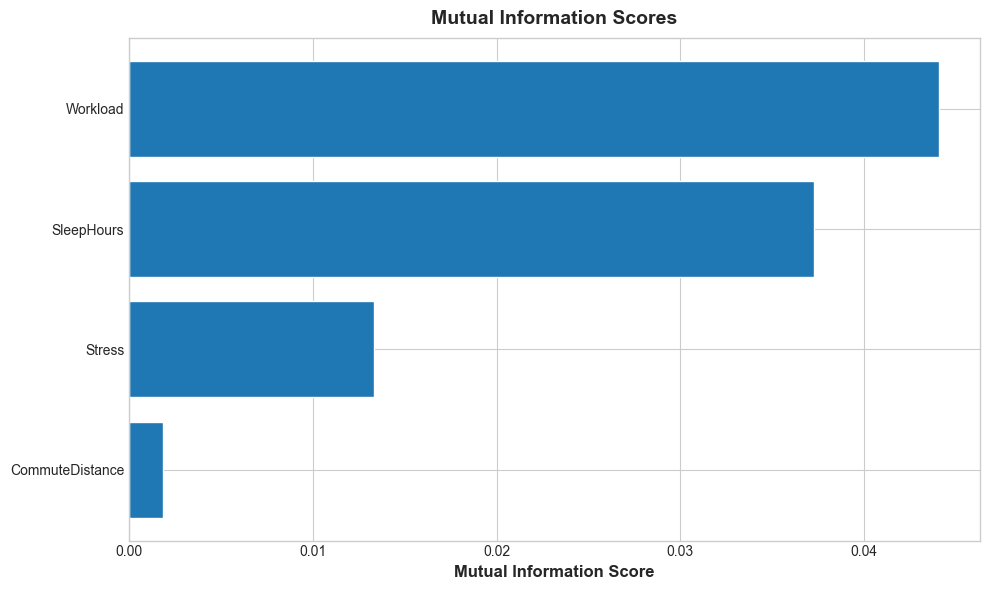

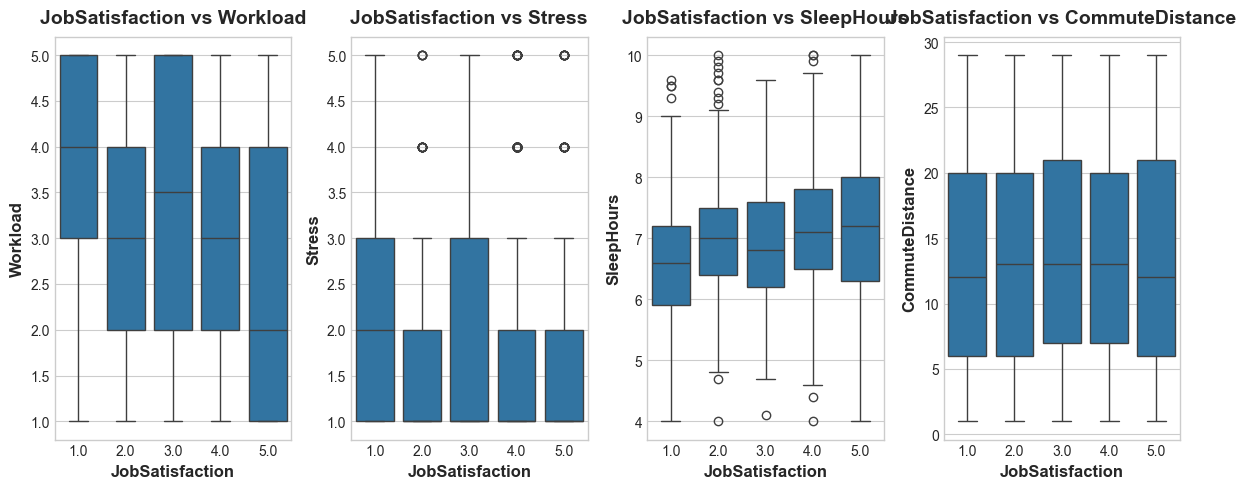

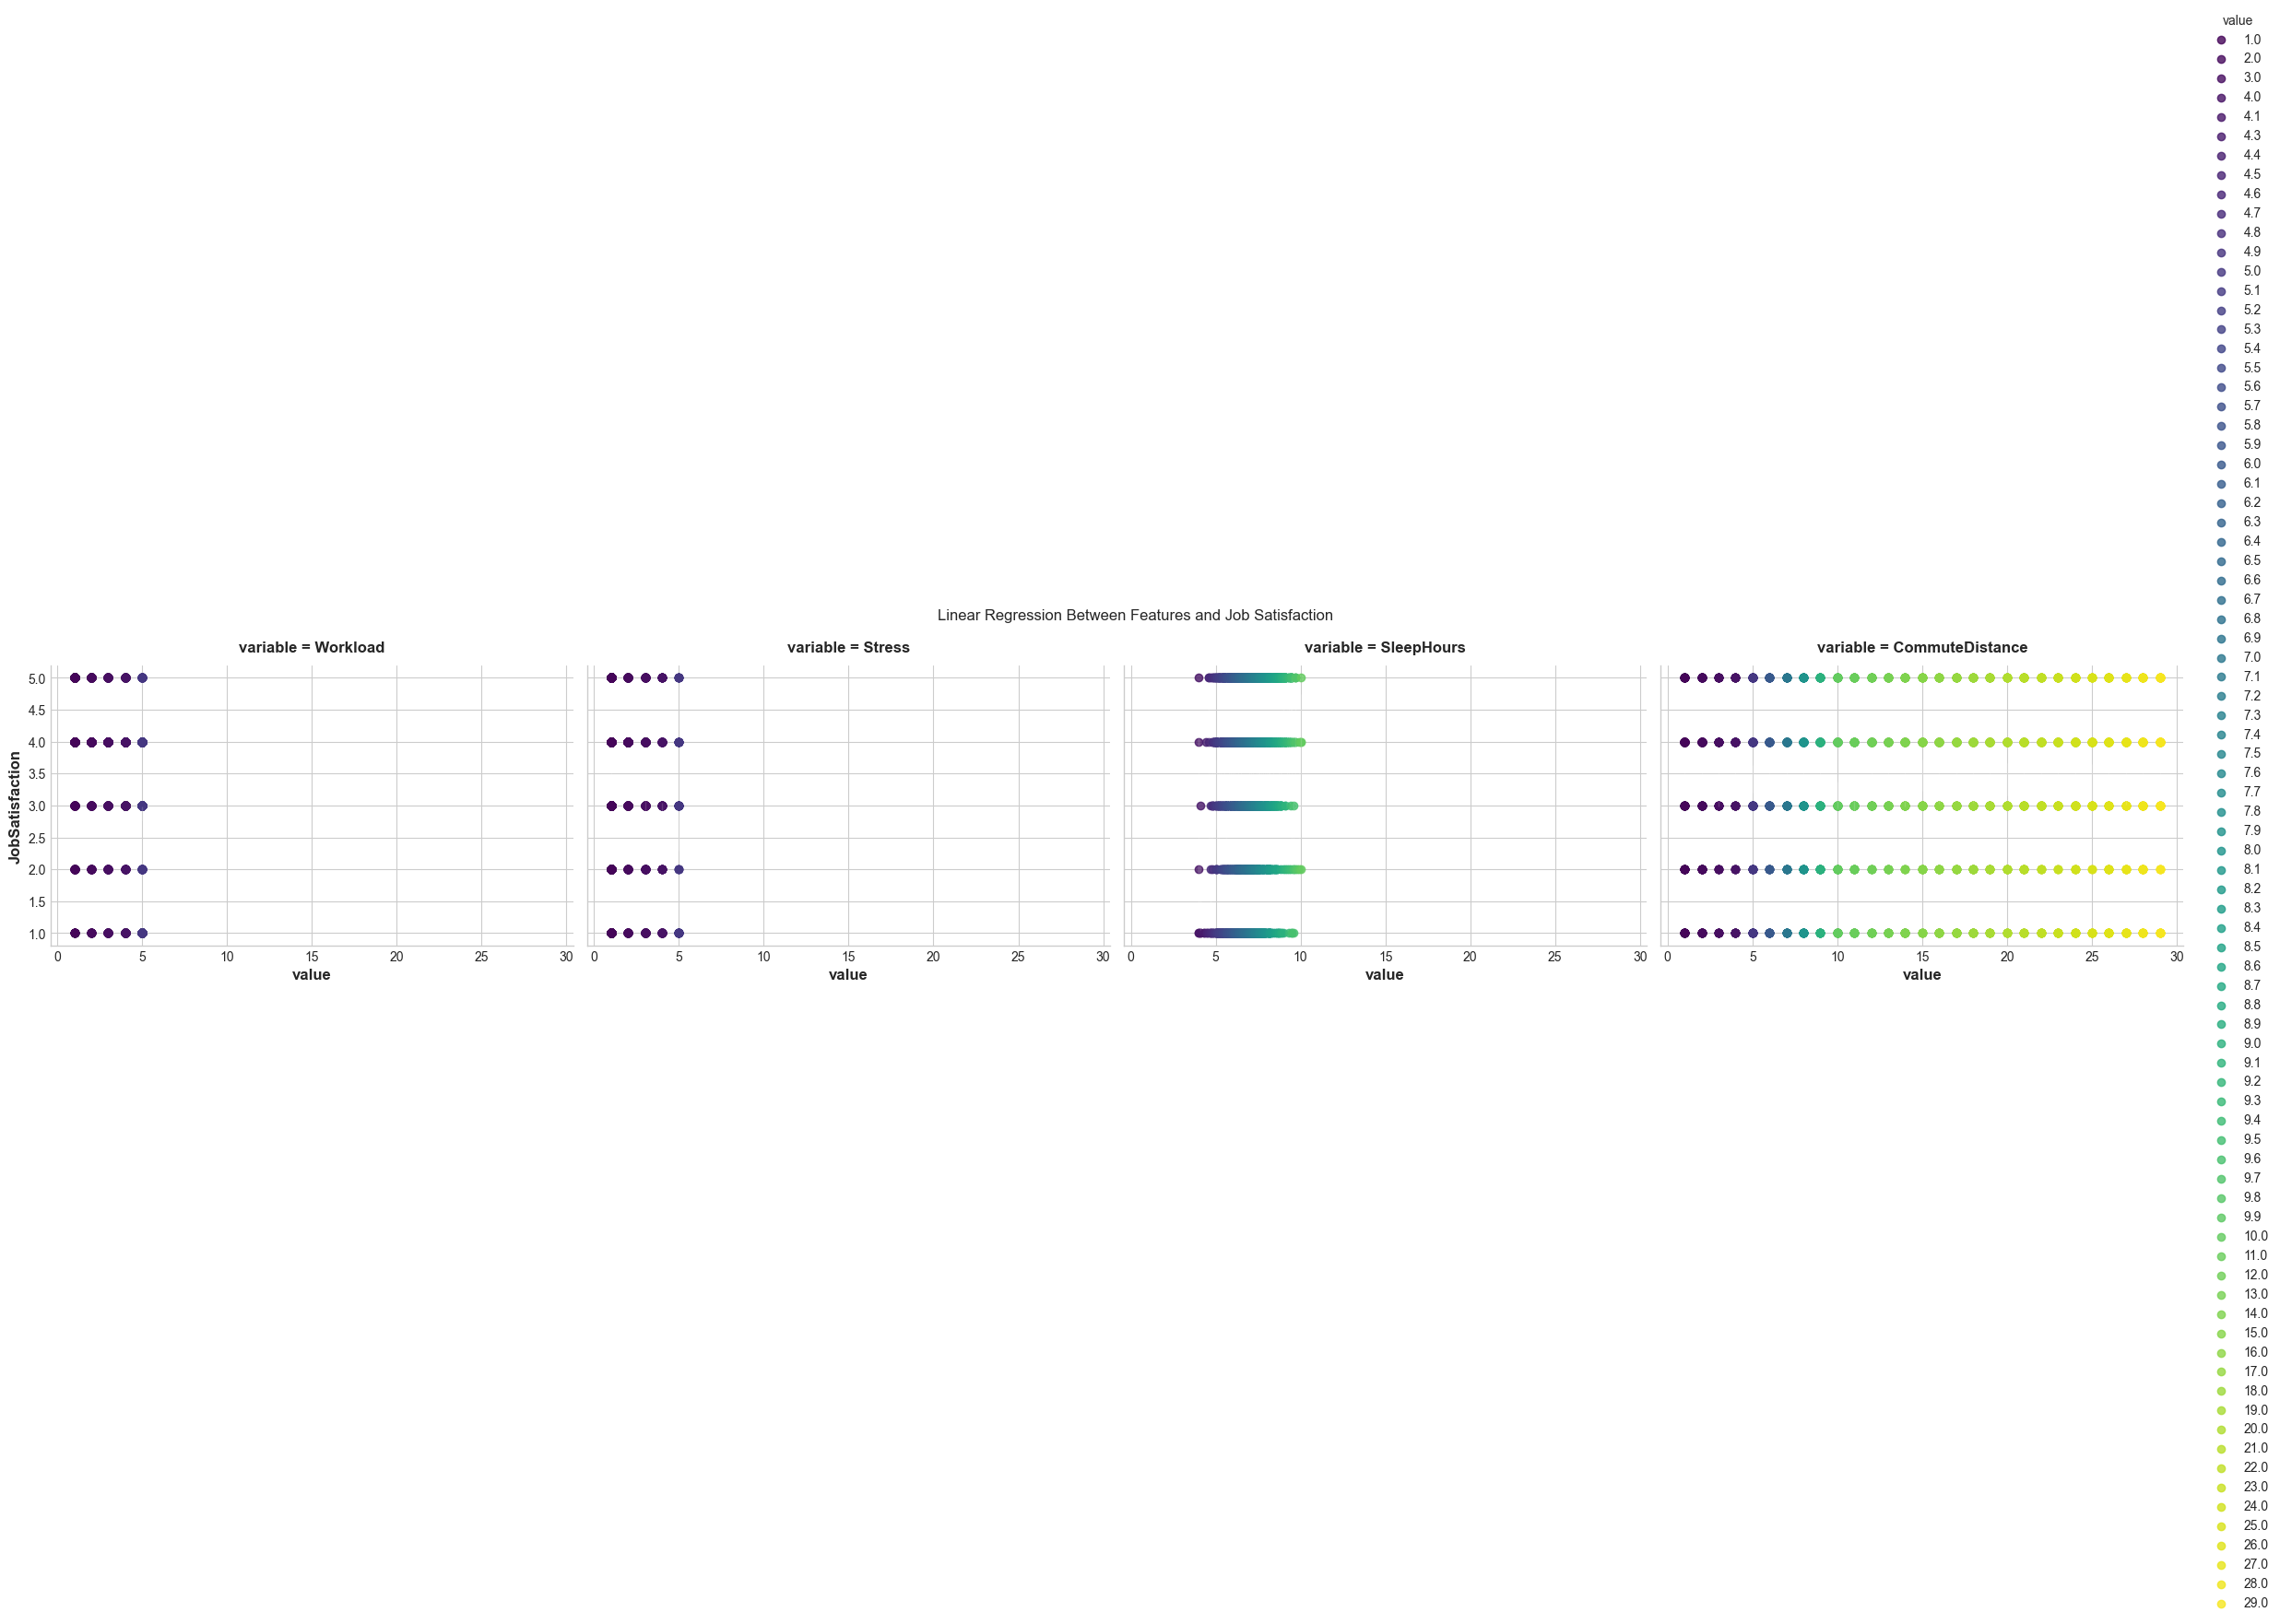

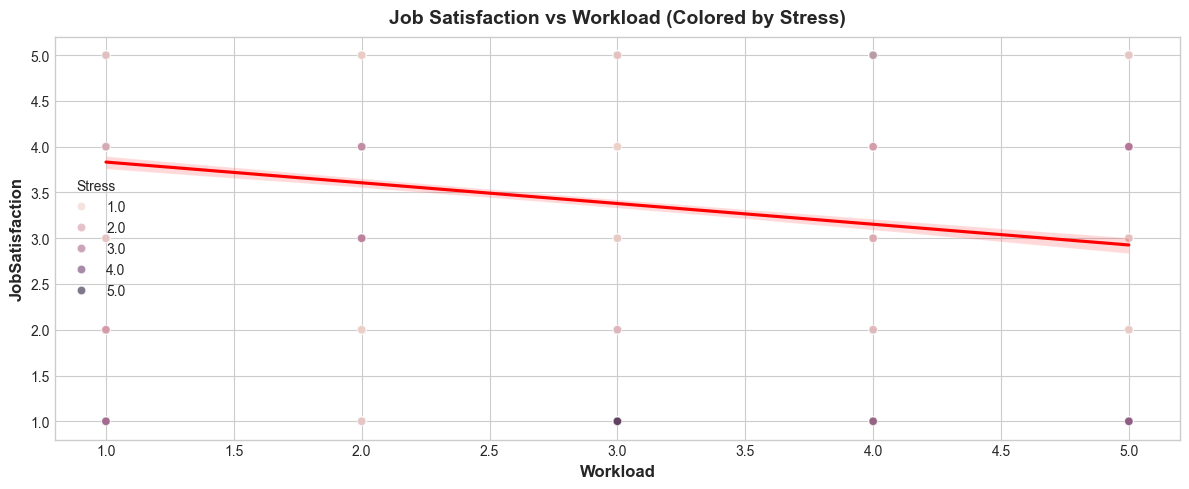

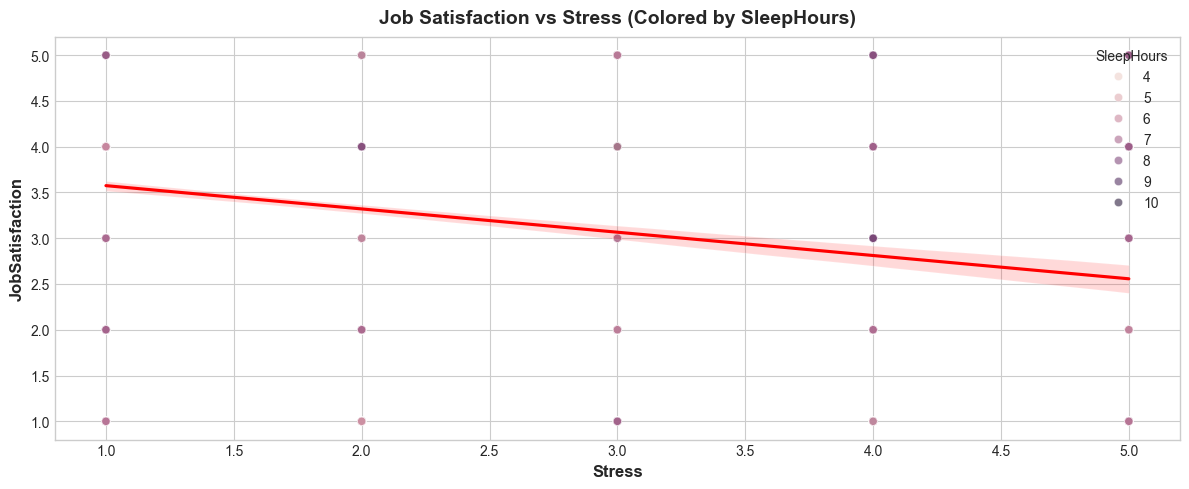

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")  # Updated style
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Set working directory
os.chdir(r'C:\Users\mnmhy\IntelliJprojects\DAI5')

# Load the dataset
df = pd.read_csv("cleaned_employees.csv")

# Display DataFrame head and info
print(df.head())
print(df.info())

# Define all features and target
features = [
    "Workload", "Stress", "SleepHours",
    "CommuteDistance"
]
target = "JobSatisfaction"

# Extract X and y
X = df[features]  # Features
y = df[target]    # Target variable

# Utility function to calculate Mutual Information scores
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()  # Factorize categorical variables
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Utility function to plot Mutual Information scores
def plot_mi_scores(scores):
    plt.figure(figsize=(10, 6))  # Specify figure size for better visibility
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")  # Add label for x-axis
    plt.show()  # Show the plot

# Calculate MI scores and plot
mi_scores = make_mi_scores(X, y)  # Calculate MI scores
print("Mutual Information Scores:")
print(mi_scores)  # Print MI scores for review
plot_mi_scores(mi_scores)           # Plot MI scores

# Melt the DataFrame for seaborn visualizations
melted_df = df.melt(id_vars=target, value_vars=features)

# Create a box plot for classification analysis
plt.figure(figsize=(12, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f"{target} vs {feature}")

plt.tight_layout()
plt.show()

# Create lmplot for regression analysis with hues
sns.lmplot(
    x="value",
    y=target,
    col="variable",
    hue="value",  # Use value for coloring, but you can modify to use another column
    data=melted_df,
    height=4,
    aspect=1.5,
    palette='viridis'
)

plt.suptitle('Linear Regression Between Features and Job Satisfaction', y=1.05)
plt.show()

# Create scatter plots with regression lines for combos of 2 features
plt.figure(figsize=(12, 5))

# Use combinations of two features for analysis
sns.scatterplot(data=df, x="Workload", y="JobSatisfaction", hue="Stress", alpha=0.6)
sns.regplot(data=df, x="Workload", y="JobSatisfaction", scatter=False, color='red')
plt.title("Job Satisfaction vs Workload (Colored by Stress)")
plt.show()

plt.figure(figsize=(12, 5))

sns.scatterplot(data=df, x="Stress", y="JobSatisfaction", hue="SleepHours", alpha=0.6)
sns.regplot(data=df, x="Stress", y="JobSatisfaction", scatter=False, color='red')
plt.title("Job Satisfaction vs Stress (Colored by SleepHours)")
plt.show()


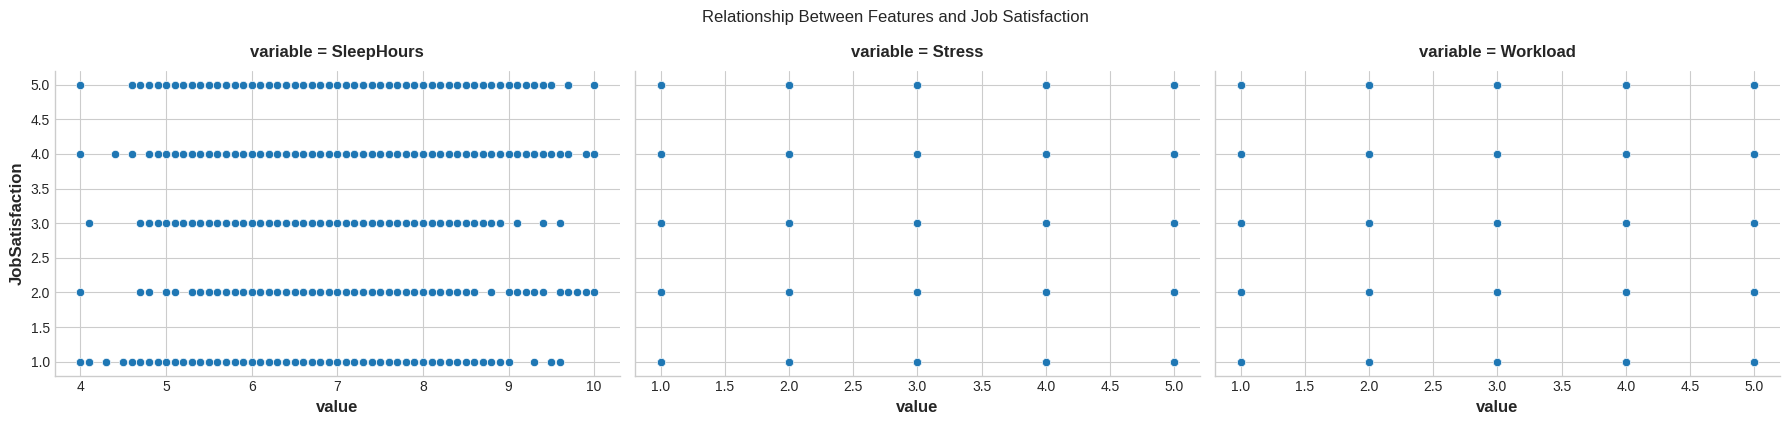

In [11]:
features = ["SleepHours", "Stress", "Workload"]
sns.relplot(
    x="value", y="JobSatisfaction", col="variable", data=df.melt(id_vars="JobSatisfaction", value_vars=features), facet_kws=dict(sharex=False),
);

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_employees.csv")

# Define features and target
features = ["Workload", "Stress", "SleepHours", "CommuteDistance"]

# Create interaction features
df['Workload_Stress'] = df['Workload'] * df['Stress']
df['Workload_SleepHours'] = df['Workload'] * df['SleepHours']
df['Stress_SleepHours'] = df['Stress'] * df['SleepHours']

# Binning for Workload
df['Workload_Bin'] = pd.cut(df['Workload'], bins=[0, 20, 40, 60, 80, 100],
                            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], right=False)

# Scaling features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])  # Scale the selected features

# Frequency Encoding for CommuteDistance
freq_encoding = df['CommuteDistance'].value_counts(normalize=True)
df['CommuteDistance_Encoded'] = df['CommuteDistance'].map(freq_encoding)

# Mathematical Transformations
df['Workload_Stress_Ratio'] = df['Workload'] / (df['Stress'] + 1e-9)
df['Stress_SleepHours_Ratio'] = df['Stress'] / (df['SleepHours'] + 1e-9)
df['Total_Workload'] = df['Workload'] + df['Stress'] + df['SleepHours']

# Grouped Transformations (if applicable)
if 'Department' in df.columns:
    department_stats = df.groupby('Department').agg({
        'Workload': 'mean',
        'Stress': 'mean',
        'SleepHours': 'mean'
    }).reset_index().rename(columns={
        'Workload': 'Dept_Workload_Mean',
        'Stress': 'Dept_Stress_Mean',
        'SleepHours': 'Dept_SleepHours_Mean'
    })
    df = df.merge(department_stats, on='Department', how='left')

# One-hot encoding for CommuteDistance
df = pd.get_dummies(df, columns=['CommuteDistance'], drop_first=True)

# Display the first few rows of the processed DataFrame
print(df.head())

   EmpID  Gender   Age MaritalStatus        JobLevel  Experience       Dept  \
0    6.0    Male  32.0       Married             Mid         7.0         IT   
1   11.0  Female  34.0       Married             Mid        12.0    Finance   
2   33.0  Female  23.0        Single  Intern/Fresher         1.0  Marketing   
3   20.0  Female  29.0       Married          Junior         6.0         IT   
4   28.0   Other  23.0        Single          Junior         1.0      Sales   

     EmpType  PhysicalActivityHours  Workload  ...  \
0  Full-Time                    2.5 -0.689995  ...   
1  Full-Time                    1.8 -0.689995  ...   
2  Full-Time                    2.1  1.453690  ...   
3   Contract                    1.9  0.024567  ...   
4  Part-Time                    3.7 -0.689995  ...   

   CommuteDistance_0.7757069148268558  CommuteDistance_0.8945177207686907  \
0                                True                               False   
1                               False         

Yes, your code is indeed suitable for a classification task. Here’s how each step aligns with common practices for preparing data for classification models:

###Yes, your code is indeed suitable for a classification task. Here’s how each step aligns with common practices for preparing data for classification models:

### 1. **Feature Creation**
- **Interaction Features**: Creating interaction features (e.g., `Workload_Stress`) can help capture relationships between variables that may influence the target classification.

### 2. **Binning**
- **Categorical Features**: Binning the `Workload` into categories can help improve model interpretability and performance, especially for tree-based models.

### 3. **Scaling**
- **Normalization**: Using `StandardScaler` ensures that features are on the same scale, which is crucial for many classification algorithms (like logistic regression and SVM) that are sensitive to feature scales.

### 4. **Frequency Encoding**
- **Handling Categorical Variables**: Encoding `CommuteDistance` based on frequency allows the model to leverage the distribution of this variable effectively, which can be beneficial in classification tasks.

### 5. **Mathematical Transformations**
- **Derived Features**: Features like `Workload_Stress_Ratio` can provide additional insights into the relationships between variables, potentially improving classification performance.

### 6. **Grouped Transformations**
- **Aggregated Statistics**: Calculating department-wise averages helps capture group-level insights, which can be informative for classification tasks.

### 7. **One-Hot Encoding**
- **Categorical Variables**: One-hot encoding is a standard practice to convert categorical variables into a numerical format that classification algorithms can understand.

### Conclusion
All these steps contribute to preparing your dataset for classification. By enhancing the feature set and ensuring that features are appropriately scaled and encoded, you improve the likelihood of achieving better performance from your classification models. If you have a specific classification model in mind, further tuning and feature selection may also be beneficial down the line.

Code with KMEANS

   EmpID  Gender   Age MaritalStatus        JobLevel  Experience       Dept  \
0    6.0    Male  32.0       Married             Mid         7.0         IT   
1   11.0  Female  34.0       Married             Mid        12.0    Finance   
2   33.0  Female  23.0        Single  Intern/Fresher         1.0  Marketing   
3   20.0  Female  29.0       Married          Junior         6.0         IT   
4   28.0   Other  23.0        Single          Junior         1.0      Sales   

     EmpType  PhysicalActivityHours  Workload  ...  \
0  Full-Time                    2.5 -0.689995  ...   
1  Full-Time                    1.8 -0.689995  ...   
2  Full-Time                    2.1  1.453690  ...   
3   Contract                    1.9  0.024567  ...   
4  Part-Time                    3.7 -0.689995  ...   

   CommuteDistance_0.8945177207686907  CommuteDistance_1.0133285267105256  \
0                               False                               False   
1                               False         

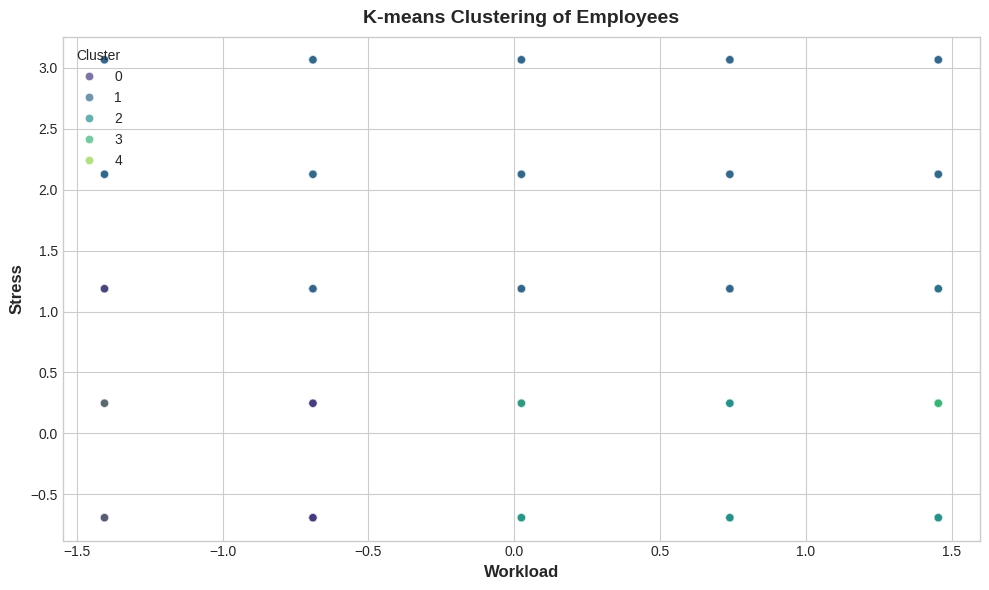

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_employees.csv")

# Define features and target
features = ["Workload", "Stress", "SleepHours", "CommuteDistance"]

# Create interaction features
df['Workload_Stress'] = df['Workload'] * df['Stress']
df['Workload_SleepHours'] = df['Workload'] * df['SleepHours']
df['Stress_SleepHours'] = df['Stress'] * df['SleepHours']

# Binning for Workload
df['Workload_Bin'] = pd.cut(df['Workload'], bins=[0, 20, 40, 60, 80, 100],
                            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], right=False)

# Frequency Encoding for CommuteDistance
freq_encoding = df['CommuteDistance'].value_counts(normalize=True)
df['CommuteDistance_Encoded'] = df['CommuteDistance'].map(freq_encoding)

# Scaling features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])  # Scale the selected features

# Mathematical Transformations
df['Workload_Stress_Ratio'] = df['Workload'] / (df['Stress'] + 1e-9)
df['Stress_SleepHours_Ratio'] = df['Stress'] / (df['SleepHours'] + 1e-9)
df['Total_Workload'] = df['Workload'] + df['Stress'] + df['SleepHours']

# Grouped Transformations (if applicable)
if 'Department' in df.columns:
    department_stats = df.groupby('Department').agg({
        'Workload': 'mean',
        'Stress': 'mean',
        'SleepHours': 'mean'
    }).reset_index().rename(columns={
        'Workload': 'Dept_Workload_Mean',
        'Stress': 'Dept_Stress_Mean',
        'SleepHours': 'Dept_SleepHours_Mean'
    })
    df = df.merge(department_stats, on='Department', how='left')

# One-hot encoding for CommuteDistance
df = pd.get_dummies(df, columns=['CommuteDistance'], drop_first=True)

# Save the processed DataFrame to a CSV file
df.to_csv("processed_employees.csv", index=False)

# Load the processed DataFrame for clustering
df = pd.read_csv("processed_employees.csv")

# Define features for clustering
clustering_features = ["Workload", "Stress", "SleepHours", "CommuteDistance_Encoded"]

# K-means Clustering
n_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

# Convert Cluster labels to categorical
df['Cluster'] = df['Cluster'].astype('category')

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

# Plotting clusters (using Workload and Stress for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workload', y='Stress', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('K-means Clustering of Employees')
plt.xlabel('Workload')
plt.ylabel('Stress')
plt.legend(title='Cluster')
plt.show()

Including job satisfaction

   EmpID  Gender   Age MaritalStatus        JobLevel  Experience       Dept  \
0    6.0    Male  32.0       Married             Mid         7.0         IT   
1   11.0  Female  34.0       Married             Mid        12.0    Finance   
2   33.0  Female  23.0        Single  Intern/Fresher         1.0  Marketing   
3   20.0  Female  29.0       Married          Junior         6.0         IT   
4   28.0   Other  23.0        Single          Junior         1.0      Sales   

     EmpType  WLB  WorkEnv  ...  CommuteDistance_0.8945177207686907  \
0  Full-Time  1.0      1.0  ...                                   0   
1  Full-Time  2.0      1.0  ...                                   0   
2  Full-Time  2.0      4.0  ...                                   0   
3   Contract  2.0      2.0  ...                                   0   
4  Part-Time  3.0      1.0  ...                                   0   

   CommuteDistance_1.0133285267105256  CommuteDistance_1.1321393326523606  \
0                    

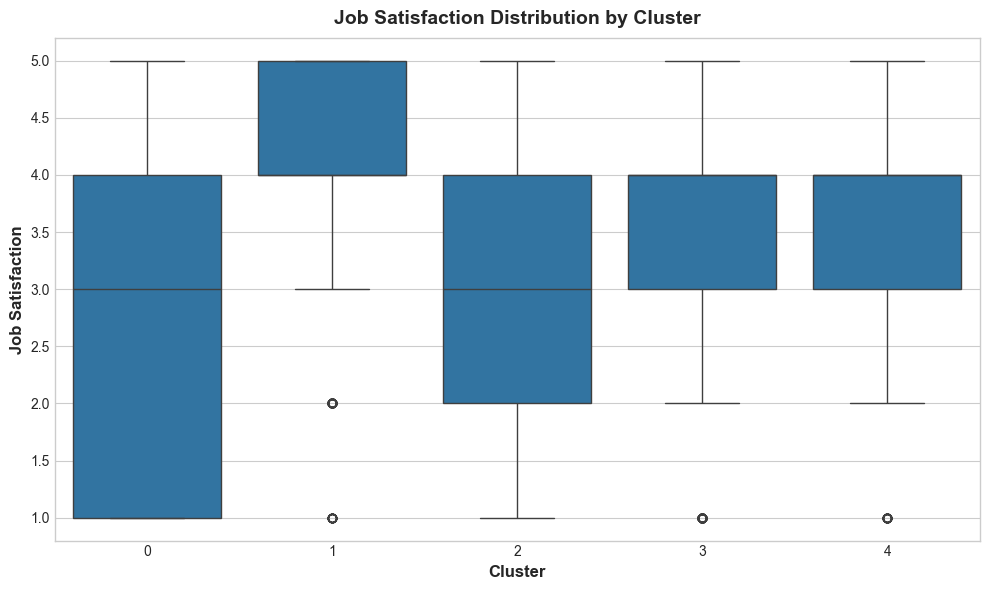

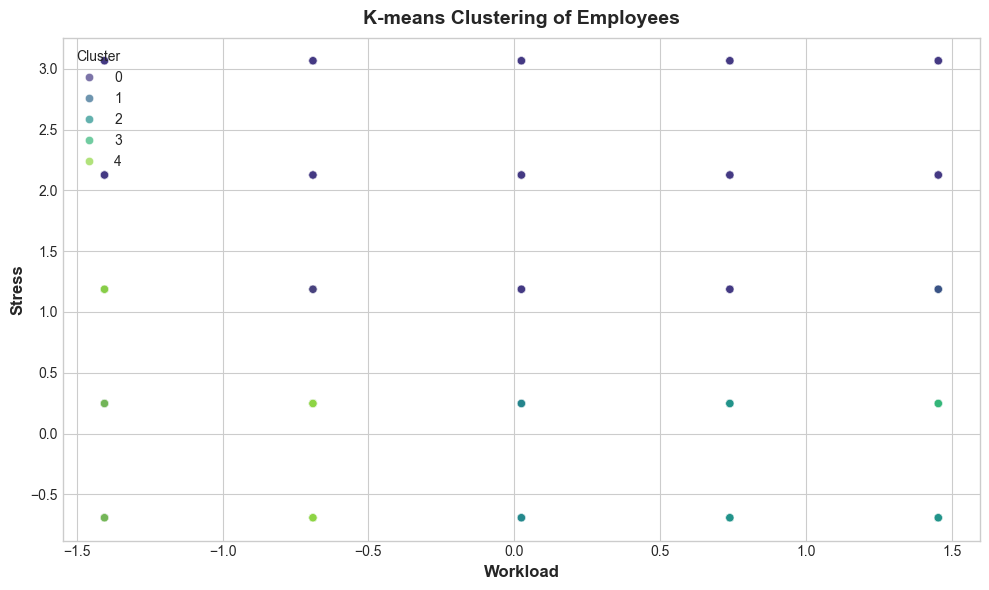

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_employees.csv")

# Define features for clustering (excluding JobSatisfaction)
features = ["Workload", "Stress", "SleepHours", "CommuteDistance"]

# Create interaction features
df['Workload_Stress'] = df['Workload'] * df['Stress']
df['Workload_SleepHours'] = df['Workload'] * df['SleepHours']
df['Stress_SleepHours'] = df['Stress'] * df['SleepHours']

# Binning for Workload
df['Workload_Bin'] = pd.cut(df['Workload'], bins=[0, 20, 40, 60, 80, 100],
                            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], right=False)

# Frequency Encoding for CommuteDistance
freq_encoding = df['CommuteDistance'].value_counts(normalize=True)
df['CommuteDistance_Encoded'] = df['CommuteDistance'].map(freq_encoding)

# Scaling features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])  # Scale the selected features

# Mathematical Transformations
df['Workload_Stress_Ratio'] = df['Workload'] / (df['Stress'] + 1e-9)
df['Stress_SleepHours_Ratio'] = df['Stress'] / (df['SleepHours'] + 1e-9)
df['Total_Workload'] = df['Workload'] + df['Stress'] + df['SleepHours']

# Grouped Transformations (if applicable)
if 'Department' in df.columns:
    department_stats = df.groupby('Department').agg({
        'Workload': 'mean',
        'Stress': 'mean',
        'SleepHours': 'mean'
    }).reset_index().rename(columns={
        'Workload': 'Dept_Workload_Mean',
        'Stress': 'Dept_Stress_Mean',
        'SleepHours': 'Dept_SleepHours_Mean'
    })
    df = df.merge(department_stats, on='Department', how='left')

# One-hot encoding for CommuteDistance
df = pd.get_dummies(df, columns=['CommuteDistance'], drop_first=True)

# Save the processed DataFrame to a CSV file
df.to_csv("processed_employees.csv", index=False)

# Load the processed DataFrame for clustering
df = pd.read_csv("processed_employees.csv")

# Define features for clustering (excluding JobSatisfaction)
clustering_features = ["Workload", "Stress", "SleepHours", "CommuteDistance_Encoded"]

# K-means Clustering
n_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

# Convert Cluster labels to categorical
df['Cluster'] = df['Cluster'].astype('category')

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

# Analyze Job Satisfaction by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Job Satisfaction')
plt.show()

# Plotting clusters (using Workload and Stress for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Workload', y='Stress', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('K-means Clustering of Employees')
plt.xlabel('Workload')
plt.ylabel('Stress')
plt.legend(title='Cluster')
plt.show()

Explained Variance Ratio: [0.41754126 0.2736147  0.15437085 0.14007306]
Number of Components: 4


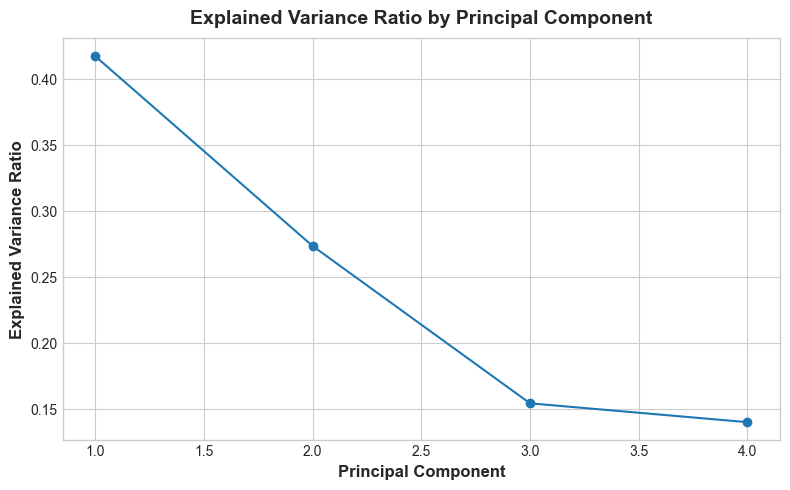

   EmpID   Age  Experience  WLB  WorkEnv  PhysicalActivityHours  Workload  \
0    6.0  32.0         7.0  1.0      1.0                    2.5       2.0   
1   11.0  34.0        12.0  2.0      1.0                    1.8       2.0   
2   33.0  23.0         1.0  2.0      4.0                    2.1       5.0   
3   20.0  29.0         6.0  2.0      2.0                    1.9       3.0   
4   28.0  23.0         1.0  3.0      1.0                    3.7       2.0   

   Stress  SleepHours  CommuteDistance  ...  CommuteMode_Motorbike  \
0     1.0         7.6             20.0  ...                      0   
1     2.0         7.9             15.0  ...                      0   
2     4.0         6.5             17.0  ...                      1   
3     1.0         7.5             13.0  ...                      0   
4     1.0         4.9             20.0  ...                      0   

   CommuteMode_Public Transport  CommuteMode_Walk Workload_Stress  \
0                             0                

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("cleaned_employees.csv")

# Define categorical columns for one-hot encoding
categorical_columns = ["Gender", "MaritalStatus", "JobLevel", "Dept", "EmpType", "CommuteMode"]

# Apply one-hot encoding to categorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ensure that CommuteDistance is treated as a continuous variable
# Apply scaling for continuous variables
continuous_features = ["Workload", "Stress", "SleepHours", "CommuteDistance"]  # Include numerical columns

# Interaction features
df['Workload_Stress'] = df['Workload'] * df['Stress']
df['Workload_SleepHours'] = df['Workload'] * df['SleepHours']
df['Stress_SleepHours'] = df['Stress'] * df['SleepHours']

# Add interaction features to the list of numerical features for scaling
numerical_features = continuous_features + ['Workload_Stress', 'Workload_SleepHours', 'Stress_SleepHours']

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Apply PCA to the scaled data
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_data = pca.fit_transform(scaled_data)

# Check explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

# Plot the explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Add principal components back to the DataFrame
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Concatenate the PCA data with the original DataFrame
df_pca = pd.concat([df.reset_index(drop=True), pca_df], axis=1)

# Display the first few rows of the final DataFrame
print(df_pca.head())

# Save the processed data to a CSV file
df_pca.to_csv("processed_employees_with_pca.csv", index=False)

In [13]:
print(df_pca)

       EmpID   Age  Experience  WLB  WorkEnv  PhysicalActivityHours  Workload  \
0        6.0  32.0         7.0  1.0      1.0                    2.5       2.0   
1       11.0  34.0        12.0  2.0      1.0                    1.8       2.0   
2       33.0  23.0         1.0  2.0      4.0                    2.1       5.0   
3       20.0  29.0         6.0  2.0      2.0                    1.9       3.0   
4       28.0  23.0         1.0  3.0      1.0                    3.7       2.0   
...      ...   ...         ...  ...      ...                    ...       ...   
3020  2070.0  47.0        16.0  1.0      3.0                    1.9       4.0   
3021  2072.0  47.0         8.0  3.0      1.0                    1.5       2.0   
3022  2145.0  41.0        17.0  1.0      1.0                    1.3       1.0   
3023  2168.0  54.0        16.0  1.0      5.0                    2.5       3.0   
3024  2183.0  44.0        22.0  3.0      3.0                    1.1       3.0   

      Stress  SleepHours  C